In [427]:
import pandas as pd
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as bsoup
import lxml
from urllib.request import Request, urlopen

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import numpy as np
from datetime import date
from datetime import datetime, timedelta

import math
import seaborn as sns  #The cool light blue background in plots is due to seaborn
sns.set(style='darkgrid', context='talk', palette = 'Dark2')

import matplotlib.dates as mdates
import time as time

In [428]:
dfc = pd.DataFrame()
dfp = pd.DataFrame()

In [429]:
def calliv():
    
    link = 'https://www.nseindia.com/live_market/dynaContent/live_watch/option_chain/optionKeys.jsp?symbolCode=-9999&symbol=BANKNIFTY&symbol=BANKNIFTY&instrument=OPTIDX&date=-&segmentLink=17&segmentLink=17'
    req = Request(link, headers = {'user-agent' : 'Mozilla/5.0'})
    page = urlopen(req).read()
    dfs = pd.read_html(page, header=0)

    chain = pd.DataFrame()

    chain = dfs[1] 
    chain.drop(chain.index[[0,1,2]], inplace = True)
    chain.reset_index(inplace = True)

    strike = []
    iv = []

    for i in range(len(chain['Unnamed: 11'])):
    
      try:
        
        iv.append(float(chain['Unnamed: 4'][i]))
        strike.append(float(chain['Unnamed: 11'][i]))
        
      except Exception:
        
        pass

    d = dict(zip(strike, iv))    
      
    df = pd.DataFrame([d.values()], columns = d.keys())
    df['Time'] = ""
    df['Time'][0] = datetime.now().strftime('%I:%M %p')
    #df.index = datetime.now().strftime('%I:%M %p')
    global dfc
    dfc = pd.concat([dfc,df], ignore_index = True)
    
    #return df.tail(1)
    
def putiv():
    
    link = 'https://www.nseindia.com/live_market/dynaContent/live_watch/option_chain/optionKeys.jsp?symbolCode=-9999&symbol=BANKNIFTY&symbol=BANKNIFTY&instrument=OPTIDX&date=-&segmentLink=17&segmentLink=17'
    req = Request(link, headers = {'user-agent' : 'Mozilla/5.0'})
    page = urlopen(req).read()
    dfs = pd.read_html(page, header=0)

    chain = pd.DataFrame()

    chain = dfs[1] 
    chain.drop(chain.index[[0,1,2]], inplace = True)
    chain.reset_index(inplace = True)

    strike = []
    iv = []

    for i in range(len(chain['Unnamed: 11'])):
    
      try:
        
        iv.append(float(chain['Unnamed: 18'][i]))
        strike.append(float(chain['Unnamed: 11'][i]))
        
      except Exception:
        
        pass

    d = dict(zip(strike, iv))    
      
    df = pd.DataFrame([d.values()], columns = d.keys())
    df['Time'] = ""
    df['Time'][0] = datetime.now().strftime('%I:%M %p')
    
    global dfp
    dfp = pd.concat([dfp,df], ignore_index = True)


In [430]:
def iv_update(interval):
    
    while True:
        
        calliv()
        putiv()
        
        time.sleep(interval)
        #print(df.tail(1))

In [443]:
# Format TYPE = calliv or putiv
# Format STRIKE = 24500.0

def plotiv(type_,strike):
    
    if type_ == 'call':
        
        plt.scatter(dfc['Time'],dfc[strike], color = 'tab:red')
        plt.plot(dfc[strike], label = 'IV Curve')
        plt.title('{}_Call Today IV History'.format(strike))
        plt.xlabel('Time')
        plt.ylabel('Implied Volatility')
        plt.xticks(rotation = 60)
        plt.legend()
        
    else:
        
        plt.scatter(dfp['Time'],dfp[strike], color = 'tab:red')
        plt.plot(dfp[strike], label = 'IV Curve')
        plt.title('{}_Put Today IV History'.format(strike))
        plt.xlabel('Time')
        plt.ylabel('Implied Volatility')
        plt.xticks(rotation = 60)
        plt.legend()
        

In [440]:
iv_update(120)

/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: FutureWarni

URLError: <urlopen error [Errno -2] Name or service not known>

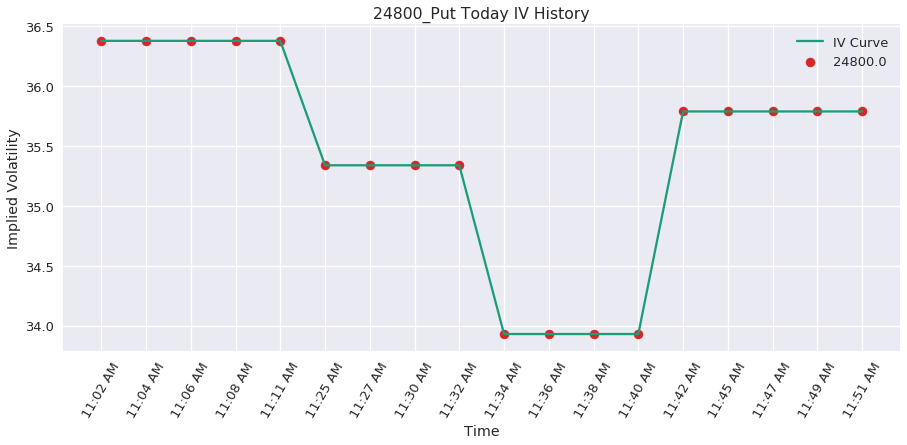

In [444]:
plotiv('put',24800)

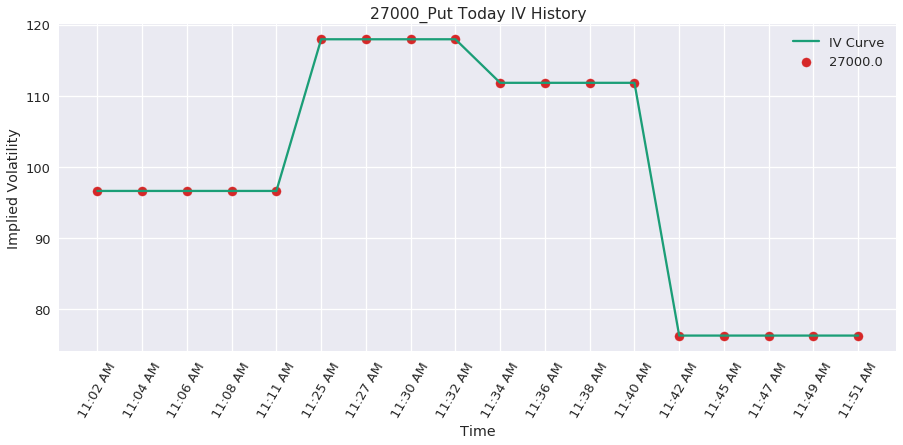

In [445]:
plotiv('put',27000)

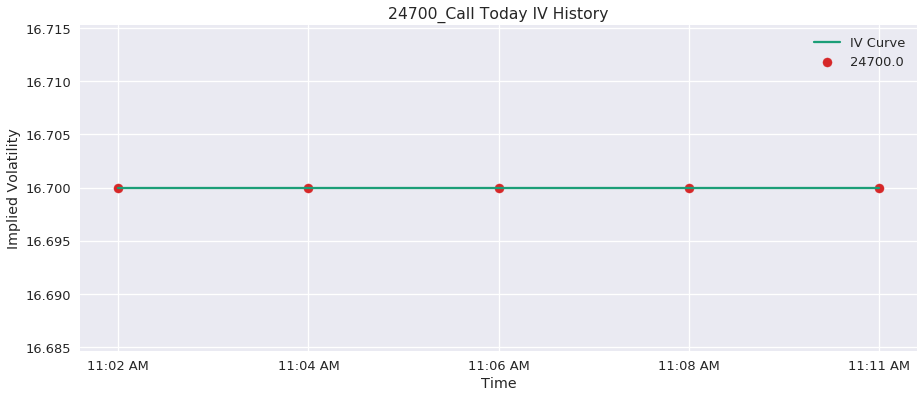

In [437]:
plotiv('call', 24700)

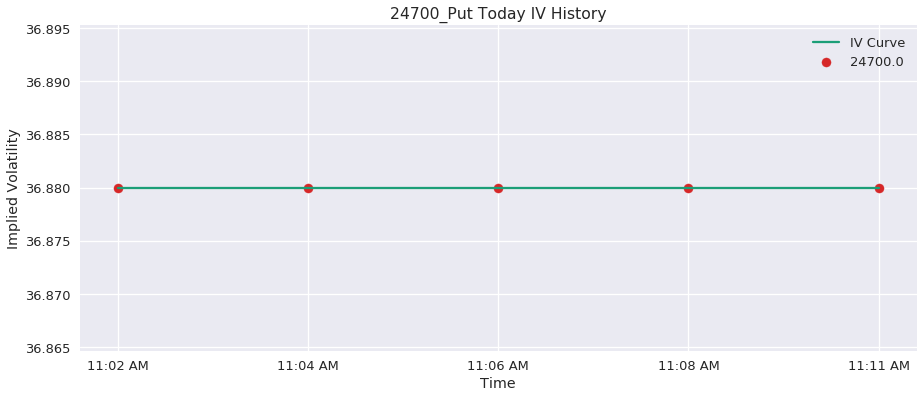

In [435]:
plotiv('put',24700)

In [426]:
dfp

,22800.0,22900.0,23000.0,23100.0,23200.0,23300.0,23400.0,23500.0,23600.0,23700.0,...,25300.0,25400.0,25500.0,25800.0,25900.0,26000.0,26500.0,27000.0,nan,Time
0,40.1,38.27,38.94,36.84,35.99,35.3,34.16,33.39,32.86,32.38,...,30.08,36.05,39.0,27.8,37.5,57.02,56.16,66.78,NaN,06:03 PM
1,40.1,38.27,38.94,36.84,35.99,35.3,34.16,33.39,32.86,32.38,...,30.08,36.05,39.0,27.8,37.5,57.02,56.16,66.78,NaN,06:05 PM
2,40.1,38.27,38.94,36.84,35.99,35.3,34.16,33.39,32.86,32.38,...,30.08,36.05,39.0,27.8,37.5,57.02,56.16,66.78,NaN,06:06 PM
3,40.1,38.27,38.94,36.84,35.99,35.3,34.16,33.39,32.86,32.38,...,30.08,36.05,39.0,27.8,37.5,57.02,56.16,66.78,NaN,06:09 PM
4,40.1,38.27,38.94,36.84,35.99,35.3,34.16,33.39,32.86,32.38,...,30.08,36.05,39.0,27.8,37.5,57.02,56.16,66.78,NaN,06:11 PM
5,40.1,38.27,38.94,36.84,35.99,35.3,34.16,33.39,32.86,32.38,...,30.08,36.05,39.0,27.8,37.5,57.02,56.16,66.78,NaN,06:12 PM
6,40.1,38.27,38.94,36.84,35.99,35.3,34.16,33.39,32.86,32.38,...,30.08,36.05,39.0,27.8,37.5,57.02,56.16,66.78,NaN,06:14 PM


In [434]:
dfc

,24700.0,24800.0,24900.0,25000.0,25100.0,25200.0,25300.0,25400.0,25500.0,25600.0,...,26600.0,26700.0,26800.0,27000.0,27100.0,27500.0,28000.0,28900.0,nan,Time
0,16.7,20.81,22.17,23.58,24.29,24.81,25.22,25.47,25.97,26.71,...,45.98,45.99,47.16,49.14,46.14,61.53,65.97,90.77,NaN,11:02 AM
1,16.7,20.81,22.17,23.58,24.29,24.81,25.22,25.47,25.97,26.71,...,45.98,45.99,47.16,49.14,46.14,61.53,65.97,90.77,NaN,11:04 AM
2,16.7,20.81,22.17,23.58,24.29,24.81,25.22,25.47,25.97,26.71,...,45.98,45.99,47.16,49.14,46.14,61.53,65.97,90.77,NaN,11:06 AM
3,16.7,20.81,22.17,23.58,24.29,24.81,25.22,25.47,25.97,26.71,...,45.98,45.99,47.16,49.14,46.14,61.53,65.97,90.77,NaN,11:08 AM
4,16.7,20.81,22.17,23.58,24.29,24.81,25.22,25.47,25.97,26.71,...,45.98,45.99,47.16,49.14,46.14,61.53,65.97,90.77,NaN,11:11 AM


In [315]:
dfp.to_csv('/home/ayush/Desktop/iv/iv.csv')

In [314]:
dfc.to_csv('/home/ayush/Desktop/iv/piv.csv')